## Chapter 9 - Hierarchical Models

- [9.2.4 - Example: Therapeutic touch](#9.2.4---Example:-Therapeutic-touch)   
    - [Shrinkage](#Shrinkage)
- [9.5.1 - Example: Baseball batting abilities by position (subjects within categories)](#9.5.1---Example:-Baseball-batting-abilities-by-position)   

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from matplotlib import gridspec

%matplotlib inline
plt.style.use('seaborn-white')

color = '#87ceeb'

### 9.2.4 - Example: Therapeutic touch

In [2]:
df = pd.read_csv('data/TherapeuticTouchData.csv', dtype={'s':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 2 columns):
y    280 non-null int64
s    280 non-null category
dtypes: category(1), int64(1)
memory usage: 2.8 KB


In [3]:
df.head()

,y,s
0,1,S01
1,0,S01
2,0,S01
3,0,S01
4,0,S01


#### Figure 9.9

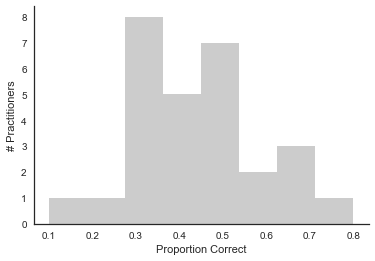

In [4]:
df_proportions = df.groupby('s')['y'].apply(lambda x: x.sum()/len(x))

ax = sns.distplot(df_proportions, bins=8, kde=False, color='gray')
ax.set(xlabel='Proportion Correct', ylabel='# Practitioners')
sns.despine(ax=ax);

#### Model (Kruschke, 2015)

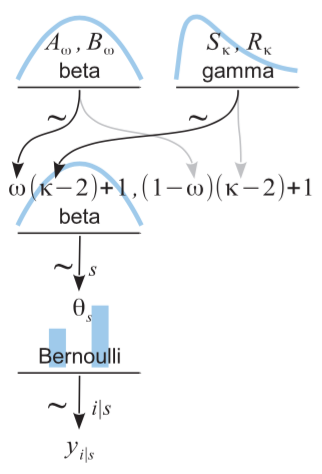

In [5]:
Image('images/fig9_7.png', width=200)

In [6]:
practitioner_idx = df.s.cat.codes.as_matrix()
practitioner_codes = df.s.cat.categories
n_practitioners = practitioner_codes.size

with pm.Model() as hierarchical_model:
    omega = pm.Beta('omega', 1, 1)
    kappa = pm.Gamma('kappa', 0.01, 0.01)

    theta = pm.Beta('theta', omega*(kappa)+1, (1-omega)*(kappa)+1, shape=n_practitioners)
    
    y = pm.Bernoulli('y', theta[practitioner_idx], observed=df.y)    

In [24]:
with hierarchical_model:
    trace = pm.sample(5000, tune=2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 200.59: 100%|██████████| 200000/200000 [00:32<00:00, 6235.69it/s]
Finished [100%]: Average Loss = 200.59
100%|██████████| 5000/5000 [00:18<00:00, 265.48it/s]


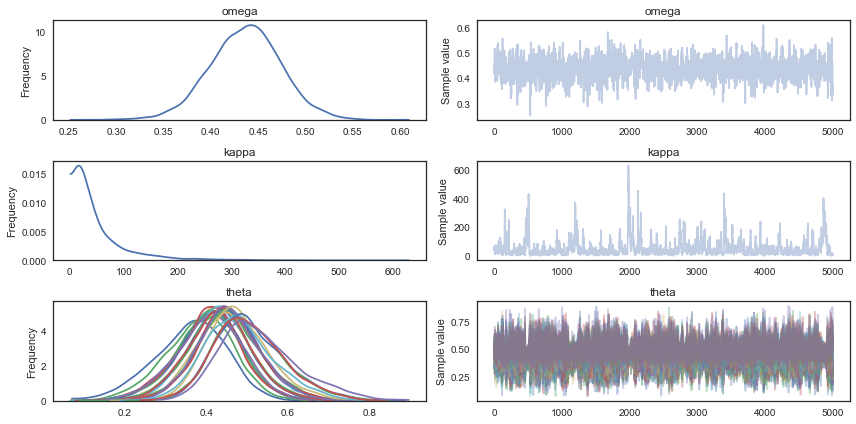

In [25]:
pm.traceplot(trace);

In [26]:
pm.df_summary(trace)
# Note that theta is indexed starting with 0 and not 1, as is the case in Kruschke (2015).

,mean,sd,mc_error,hpd_2.5,hpd_97.5
omega,0.435786,0.037761,0.001176,0.359104,0.509325
kappa,51.916454,57.569488,3.607012,2.566695,164.604502
theta__0,0.358746,0.088644,0.003044,0.183224,0.528315
theta__1,0.381377,0.084055,0.002305,0.212721,0.542092
theta__2,0.403796,0.083708,0.001691,0.244238,0.578510
theta__3,0.405947,0.080741,0.001776,0.242137,0.566982
theta__4,0.405717,0.080627,0.001663,0.233510,0.562790
theta__5,0.405723,0.082043,0.001856,0.237750,0.564731
theta__6,0.407064,0.081642,0.001726,0.239788,0.563377
theta__7,0.405750,0.081295,0.001689,0.237559,0.563507


#### Figure 9.10 - Marginal posterior distributions

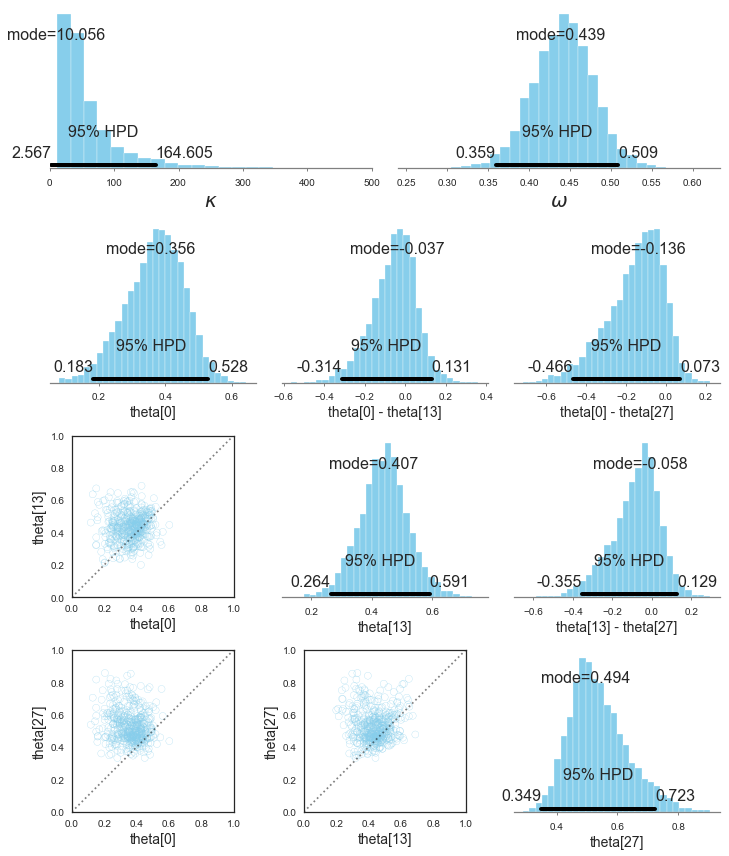

In [27]:
plt.figure(figsize=(10,12))

# Define gridspec
gs = gridspec.GridSpec(4, 6)
ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])
ax3 = plt.subplot(gs[1,:2])
ax4 = plt.subplot(gs[1,2:4])
ax5 = plt.subplot(gs[1,4:6])
ax6 = plt.subplot(gs[2,:2])                     
ax7 = plt.subplot(gs[2,2:4])
ax8 = plt.subplot(gs[2,4:6])
ax9 = plt.subplot(gs[3,:2])
ax10 = plt.subplot(gs[3,2:4])
ax11 = plt.subplot(gs[3,4:6])

font_d = {'size':14}

# kappa posterior plot
pm.plot_posterior(trace['kappa'], point_estimate='mode', ax=ax1, color=color)
ax1.set(xlim=(0,500))
ax1.set_xlabel('$\kappa$', fontdict={'size':20, 'weight':'bold'})

# omega posterior plot
pm.plot_posterior(trace['omega'], point_estimate='mode', ax=ax2, color=color)
ax2.set_xlabel('$\omega$', fontdict={'size':20, 'weight':'bold'})

# theta posterior plots
pm.plot_posterior(trace['theta'][:,0], point_estimate='mode', ax=ax3, color=color)
ax3.set_xlabel('theta[0]', fontdict=font_d)

pm.plot_posterior(trace['theta'][:,13], point_estimate='mode', ax=ax7, color=color)
ax7.set_xlabel('theta[13]', fontdict=font_d)

pm.plot_posterior(trace['theta'][:,27], point_estimate='mode', ax=ax11, color=color)
ax11.set_xlabel('theta[27]', fontdict=font_d)

# theta scatter plots
ax6.scatter(trace['theta'][::10,0], trace['theta'][::10,13], alpha=0.75, color=color, facecolor='none')
ax6.plot([0, 1], [0, 1], ':k', transform=ax6.transAxes, alpha=0.5)
ax6.set_xlabel('theta[0]', fontdict=font_d)
ax6.set_ylabel('theta[13]', fontdict=font_d)

ax9.scatter(trace['theta'][::10,0], trace['theta'][::10,27], alpha=0.75, color=color, facecolor='none')
ax9.plot([0, 1], [0, 1], ':k', transform=ax9.transAxes, alpha=0.5)
ax9.set_xlabel('theta[0]', fontdict=font_d)
ax9.set_ylabel('theta[27]', fontdict=font_d)

ax10.scatter(trace['theta'][::10,13], trace['theta'][::10,27], alpha=0.75, color=color, facecolor='none')
ax10.plot([0, 1], [0, 1], ':k', transform=ax10.transAxes, alpha=0.5)
ax10.set_xlabel('theta[13]', fontdict=font_d)
ax10.set_ylabel('theta[27]', fontdict=font_d)

for ax in [ax6, ax9, ax10]:
    ax.set(xlim=(0,1), ylim=(0,1), aspect='equal') 
   
# theta posterior differences plots
pm.plot_posterior(trace['theta'][:,0]-trace['theta'][:,14], point_estimate='mode', ax=ax4, color=color)
ax4.set_xlabel('theta[0] - theta[13]', fontdict=font_d)

pm.plot_posterior(trace['theta'][:,0]-trace['theta'][:,27], point_estimate='mode', ax=ax5, color=color)
ax5.set_xlabel('theta[0] - theta[27]', fontdict=font_d)

pm.plot_posterior(trace['theta'][:,13]-trace['theta'][:,27], point_estimate='mode', ax=ax8, color=color)
ax8.set_xlabel('theta[13] - theta[27]', fontdict=font_d)

plt.tight_layout();

### Shrinkage

Let's create a model with just the theta estimations per practitioner, without the influence of a higher level distribution. Then we can compare the theta values with the hierarchical model above.

In [11]:
with pm.Model() as unpooled_model:
    
    theta = pm.Beta('theta', 1, 1, shape=n_practitioners)
        
    y = pm.Bernoulli('y', theta[practitioner_idx], observed=df.y)        

In [12]:
with unpooled_model:
    unpooled_trace = pm.sample(5000, tune=2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 205.98: 100%|██████████| 200000/200000 [00:20<00:00, 9714.41it/s]
Finished [100%]: Average Loss = 205.98
100%|██████████| 5000/5000 [00:10<00:00, 486.79it/s]


Here we concatenate the trace results (thetas) from both models into a dataframe. Next we shape the data into a format that we can use with Seaborn's pointplot.

In [13]:
df_shrinkage = (pd.concat([pm.df_summary(unpooled_trace).iloc[:,0], pm.df_summary(trace).iloc[2:,0]], axis=1)
                .reset_index())
df_shrinkage.columns = ['theta', 'unpooled', 'hierarchical']
df_shrinkage = pd.melt(df_shrinkage, 'theta', ['unpooled', 'hierarchical'], var_name='Model')
df_shrinkage.head()

,theta,Model,value
0,theta__0,unpooled,0.168692
1,theta__1,unpooled,0.250912
2,theta__2,unpooled,0.332221
3,theta__3,unpooled,0.334878
4,theta__4,unpooled,0.333866


The below plot shows that the theta estimates on practitioner level are pulled towards the group mean of the hierarchical model.

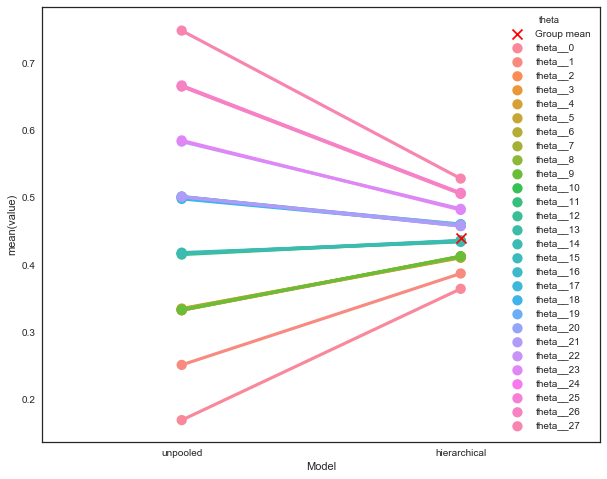

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(1, pm.df_summary(trace).iloc[0,0], s=100, c='r', marker='x', zorder=999, label='Group mean')
sns.pointplot(x='Model', y='value', hue='theta', data=df_shrinkage);

### 9.5.1 - Example: Baseball batting abilities by position

In [15]:
df2 = pd.read_csv('data/BattingAverage.csv', usecols=[0,1,2,3], dtype={'PriPos':'category'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 4 columns):
Player    948 non-null object
PriPos    948 non-null category
Hits      948 non-null int64
AtBats    948 non-null int64
dtypes: category(1), int64(2), object(1)
memory usage: 23.6+ KB


The DataFrame contains records for 948 players in the 2012 regular season of Major League Baseball.
- One record per player
- 9 primary field positions

In [16]:
df2['BatAv'] = df2.Hits.divide(df2.AtBats)
df2.head(10)

,Player,PriPos,Hits,AtBats,BatAv
0,Fernando Abad,Pitcher,1,7,0.142857
1,Bobby Abreu,Left Field,53,219,0.242009
2,Tony Abreu,2nd Base,18,70,0.257143
3,Dustin Ackley,2nd Base,137,607,0.225700
4,Matt Adams,1st Base,21,86,0.244186
5,Nathan Adcock,Pitcher,0,1,0.000000
6,Jeremy Affeldt,Pitcher,0,1,0.000000
7,Brandon Allen,1st Base,2,20,0.100000
8,Yonder Alonso,1st Base,150,549,0.273224
9,Jose Altuve,2nd Base,167,576,0.289931


In [17]:
# Batting average by primary field positions calculated from the data
df2.groupby('PriPos')['Hits','AtBats'].sum().pipe(lambda x: x.Hits/x.AtBats)

PriPos
1st Base        0.258851
2nd Base        0.255676
3rd Base        0.265036
Catcher         0.247404
Center Field    0.263513
Left Field      0.259077
Pitcher         0.129148
Right Field     0.263555
Shortstop       0.255186
dtype: float64

#### Model (Kruschke, 2015)

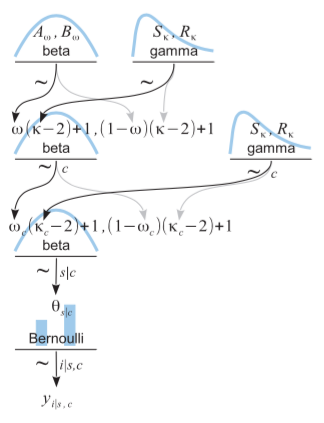

In [18]:
Image('images/fig9_13.png', width=300)

In [19]:
pripos_idx = df2.PriPos.cat.codes.as_matrix()
pripos_codes = df2.PriPos.cat.categories
n_pripos = pripos_codes.size

# df2 contains one entry per player
n_players = df2.index.size

with pm.Model() as hierarchical_model2:
    # Hyper parameters
    omega = pm.Beta('omega', 1, 1)
    kappa = pm.Gamma('kappa', 0.01, 0.01) 
    
    # Parameters for categories (Primary field positions)
    omega_c = pm.Beta('omega_c',
                       omega*(kappa)+1, (1-omega)*(kappa)+1,
                       shape = n_pripos)
    
    kappa_c = pm.Gamma('kappa_c',
                        0.01, 0.01,
                        shape = n_pripos)
    
    # Parameter for individual players
    theta = pm.Beta('theta',
                     omega_c[pripos_idx]*(kappa_c[pripos_idx])+1,
                    (1-omega_c[pripos_idx])*(kappa_c[pripos_idx])+1,
                     shape = n_players)
    
    y2 = pm.Binomial('y2', n=df2.AtBats.as_matrix(), p=theta, observed=df2.Hits)    

In [20]:
with hierarchical_model2:
    trace2 = pm.sample(3000, tune=1500, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 2,570: 100%|██████████| 200000/200000 [02:44<00:00, 1216.41it/s]  
Finished [100%]: Average Loss = 2,570
100%|██████████| 3000/3000 [01:28<00:00, 34.35it/s]


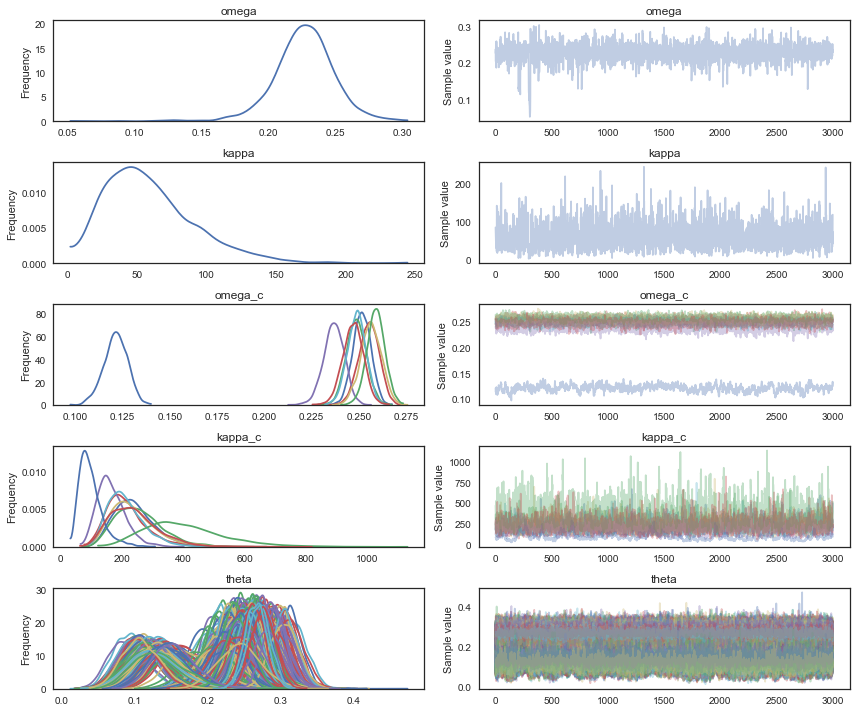

In [21]:
pm.traceplot(trace2);

#### Figure 9.17

#### Posterior distribution of hyper parameter omega after sampling.

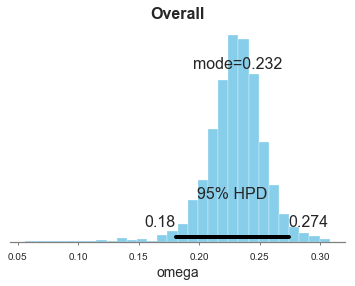

In [22]:
burnin = 100

pm.plot_posterior(trace2['omega'][burnin:], point_estimate='mode', color=color)
plt.title('Overall', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('omega', fontdict={'fontsize':14});

#### Posterior distributions of the omega_c parameters after sampling.

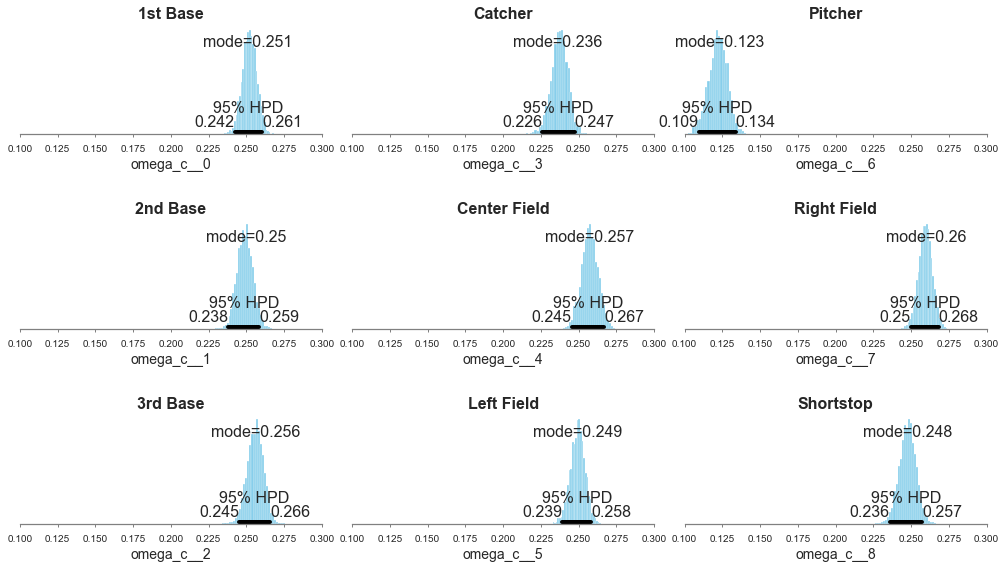

In [23]:
fig, axes = plt.subplots(3,3, figsize=(14,8))

for i, ax in enumerate(axes.T.flatten()):
    pm.plot_posterior(trace2['omega_c'][burnin:,i], ax=ax, point_estimate='mode', color=color)
    ax.set_title(pripos_codes[i], fontdict={'fontsize':16, 'fontweight':'bold'})
    ax.set_xlabel('omega_c__{}'.format(i), fontdict={'fontsize':14})
    ax.set_xlim(0.10,0.30)

plt.tight_layout(h_pad=3)